# **MACHINE LEARNING NANODEGREE**
***
## **PROJETO FINAL**
***

## **Análise Preditiva de Cota para Exercício Parlamentar (CEAP)**

## ** PARTE 1 - LIMPEZA DE DADOS**

***

## **A. Importação de Biblioteca Python**

**Serão utilizadas neste projeto as seguintes bibliotecas Python:**

> 1. Pandas
> 2. Numpy
> 3. OS

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
from seaborn import set

# Ajustar globalmente o uso de notação científica.
pd.options.display.float_format = '{:20,.2f}'.format

# Variável para definição da rotação do gráfico.
rota = 90
largura = 6
altura = 3
fonte=12
sns.set(font_scale=1.4)

# Variável para definição de tamanho de amostras da função head.
# Utilizada apenas para facilitar análise.
H = 1

***
## ** B. Data Cleaning **

Abaixo é realizado a leitura dos três arquivos do projeto e suas cópias para as variáveis **df2015**, ** df2016 ** e **df2017**. 

In [2]:
display(os.listdir('dataset'))

['.DS_Store',
 'Ano-2015.csv',
 'Ano-2016.csv',
 'Ano-2017.csv',
 'df_dom_con.csv',
 'df_fco_con.csv',
 'df_roc_con.csv',
 'df_trienio_limpo.csv']

In [3]:
## Por um problema identificado no processo de importação dos dados do feature 'txtCNPJCPF' no qual é definido como data type integer, 
## consequentemente formatando como potência de 10 fez necessário indicar o data type no momento da importação dos arquivos CSV.

df2015 = pd.read_csv('./dataset/Ano-2015.csv', delimiter=';', dtype={'txtCNPJCPF':object})
df2016 = pd.read_csv('./dataset/Ano-2016.csv', delimiter=';', dtype={'txtCNPJCPF':object})
df2017 = pd.read_csv('./dataset/Ano-2017.csv', delimiter=';', dtype={'txtCNPJCPF':object})

**A seguir são calculados:**
> 1. Através da função **describe** as estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
> 2. Utilizando-se a função **shape** obtemos as dimensões dos dados tabulares.

In [4]:
print ('Ano de 2015:', df2015.shape, 'Ano de 2016:', df2016.shape , 'Ano de 2017:', df2017.shape)

Ano de 2015: (376863, 29) Ano de 2016: (358239, 29) Ano de 2017: (341223, 29)


In [5]:
display ('Ano de 2015:', df2015.head(1), 'Ano de 2016:', df2016.head(1) , 'Ano de 2017:', df2017.head(1))

'Ano de 2015:'

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,"178,957.00",1.00,2015,RR,DEM,55.00,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,11,2015,0,NaN,NaN,1255355,"5,294.00",0.00,3074,5886345


'Ano de 2016:'

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,"178,957.00",1.00,2015,RR,DEM,55.00,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,1,2016,0,NaN,NaN,1268870,"5,369.00",0.00,3074,5928744


'Ano de 2017:'

,txNomeParlamentar,idecadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
0,ABEL MESQUITA JR.,"178,957.00",1.00,2015,RR,DEM,55.00,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,4,2017,0,NaN,NaN,1377952,"5,828.00",0.00,3074,6266962


### **B1. Arquivo do Ano de 2015**

Análise básica de estatística descritiva, formato do data frame e tipo de dados de cada feature.

In [6]:
df2015.describe()

,idecadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,"376,142.00","376,142.00","376,863.00","376,142.00","376,863.00","376,863.00","376,863.00","376,863.00","376,863.00","376,863.00","376,863.00","376,600.00","376,863.00","376,863.00","376,863.00"
mean,"138,323.59",299.90,"2,011.08",54.98,327.84,0.20,0.19,6.78,"2,015.00",0.00,"674,253.86","2,840.78",0.32,"2,195.01","3,196,887.05"
std,"42,826.91",154.18,88.05,0.13,453.69,0.41,0.40,3.26,0.00,0.03,"602,422.34","2,539.61",42.19,769.98,"2,855,408.11"
min,"3,151.00",1.00,0.00,54.00,1.00,0.00,0.00,1.00,"2,015.00",0.00,0.00,0.00,0.00,19.00,0.00
25%,"74,752.00",178.00,"2,015.00",55.00,3.00,0.00,0.00,4.00,"2,015.00",0.00,0.00,0.00,0.00,"1,703.00",0.00
50%,"160,536.00",306.00,"2,015.00",55.00,13.00,0.00,0.00,7.00,"2,015.00",0.00,"1,173,555.00","4,958.00",0.00,"2,289.00","5,623,886.00"
75%,"178,860.00",443.00,"2,015.00",55.00,999.00,0.00,0.00,10.00,"2,015.00",0.00,"1,217,394.00","5,124.00",0.00,"2,947.00","5,761,556.50"
max,"193,069.00",674.00,"2,015.00",55.00,999.00,4.00,3.00,12.00,"2,015.00",1.00,"1,316,186.00","5,642.00","10,000.00","3,138.00","6,078,873.00"


In [7]:
df2015.dtypes

txNomeParlamentar             object
idecadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura               float64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                  object
vlrGlosa                      object
vlrLiquido                    object
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
vlrRestituicao               float64
n

### **B2. Arquivo do Ano de 2016**

Análise básica de estatística descritiva, formato do data frame e tipo de dados de cada feature.

In [8]:
df2016.describe()

,idecadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,"357,340.00","357,340.00","358,239.00","357,340.00","358,239.00","358,239.00","358,239.00","358,239.00","358,239.00","358,239.00","358,239.00","358,065.00","358,239.00","358,239.00","358,239.00"
mean,"139,769.05",299.66,"2,009.94",55.00,333.15,0.21,0.19,6.43,"2,016.00",0.00,"735,293.52","3,095.48",0.25,"2,225.33","3,404,722.79"
std,"42,953.90",156.41,100.81,0.00,455.73,0.41,0.40,3.29,0.00,0.02,"647,552.68","2,726.90",33.36,770.22,"2,997,677.05"
min,"4,930.00",1.00,0.00,54.00,1.00,0.00,0.00,1.00,"2,016.00",0.00,0.00,0.00,0.00,19.00,0.00
25%,"74,812.00",176.00,"2,015.00",55.00,3.00,0.00,0.00,4.00,"2,016.00",0.00,0.00,0.00,0.00,"1,742.00",0.00
50%,"160,556.00",304.00,"2,015.00",55.00,13.00,0.00,0.00,6.00,"2,016.00",0.00,"1,269,485.00","5,379.00",0.00,"2,317.00","5,930,105.00"
75%,"178,872.00",444.00,"2,015.00",55.00,999.00,0.00,0.00,9.00,"2,016.00",0.00,"1,310,362.00","5,515.00",0.00,"2,958.00","6,060,101.50"
max,"195,997.00",589.00,"2,015.00",55.00,999.00,4.00,3.00,12.00,"2,016.00",1.00,"1,412,917.00","5,966.00","9,750.00","3,161.00","6,347,902.00"


In [9]:
df2016.dtypes

txNomeParlamentar             object
idecadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura               float64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                  object
vlrGlosa                      object
vlrLiquido                    object
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
vlrRestituicao               float64
n

### **B3. Arquivo do Ano de 2017**

Análise básica de estatística descritiva, formato do data frame e tipo de dados de cada feature.

In [10]:
df2017.describe()

,idecadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,"340,295.00","340,295.00","341,223.00","340,295.00","341,223.00","341,223.00","341,223.00","341,223.00","341,223.00","341,223.00","341,223.00","341,112.00","341,223.00","341,223.00","341,223.00"
mean,"140,546.81",309.28,"2,009.52",55.00,333.79,0.21,0.26,6.53,"2,017.00",0.00,"810,361.32","3,403.34",0.26,"2,250.82","3,655,381.11"
std,"43,284.31",163.22,104.94,0.00,454.62,0.42,0.62,3.27,0.00,0.02,"694,733.48","2,918.04",56.19,771.22,"3,132,674.58"
min,"4,930.00",1.00,0.00,55.00,1.00,0.00,0.00,1.00,"2,017.00",0.00,0.00,0.00,0.00,19.00,0.00
25%,"74,856.00",181.00,"2,015.00",55.00,3.00,0.00,0.00,4.00,"2,017.00",0.00,0.00,0.00,0.00,"1,758.00",0.00
50%,"160,561.00",313.00,"2,015.00",55.00,13.00,0.00,0.00,6.00,"2,017.00",0.00,"1,365,751.00","5,767.00",0.00,"2,340.00","6,229,502.00"
75%,"178,885.00",455.00,"2,015.00",55.00,999.00,0.00,0.00,9.00,"2,017.00",0.00,"1,412,142.00","5,929.00",0.00,"2,967.00","6,357,983.50"
max,"199,809.00",607.00,"2,015.00",55.00,999.00,4.00,4.00,12.00,"2,017.00",1.00,"1,484,725.00","6,252.00","28,450.00","3,176.00","6,553,207.00"


In [11]:
df2017.dtypes

txNomeParlamentar             object
idecadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura               float64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                  object
vlrGlosa                      object
vlrLiquido                    object
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
vlrRestituicao               float64
n

### **B4. Criando novo Data Frame concatenando os três datasets (2015, 2016 e 2017)**

Será realizada a criação de um novo Data Frame chamado ** df_trienio** com o conteúdo formado pela fusão dos três arquivos de dados: df2015, df2016 e df2017.

In [12]:
df_merged = pd.concat([df2015, df2016, df2017])
df_merged.shape

(1076325, 29)

### **B5. Definindo as colunas (features) a serem removidas **
Agora removeremos as colunas que não serão utilizadas na análise e deixaremos as seguintes colunas:

| #                   |  Número da Coluna   | Elemento de Dado         |
|:-------------------:|:-------------------:|:------------------------:|
| 1                   | 1                   |txNomeParlamentar         |
| 2                   | 5                   |sgUF                      |
| 3                   | 6                   |sgPartido                 |
| 4                   | 9                   |txtDescricao              |
| 5                   | 17                  |vlrDocumento              |
| 6                   | 20                  |numMes                    |
| 7                   | 21                  |numAno                    |

### **B6. Removendo as colunas desconsideradas**

Na tabela abaixo a coluna **'Uso'** indicada as colunas consideradas relevantes para a análise do projeto pela indicação da letra **'S'**.
Para realizar a permanência apenas dos features selecionados utilizou-se o método **'filter'** e a criação de novo data frame para este fim chamado **'df_trienio_filter'**.


In [13]:
%%html
<b> TABELA 1 - Lista de features dos arquivos e sua seleção quanto a relevância.</b>
<p></p>
<img src = 'image/tabela.png', width = 1000, align = left>

In [14]:
## Ao invés de darmos 'drop' nos features que não desejamos, que são 21 features, 
## iremos selecionar as colunas desejadas, e inserindo os dados no novo dataframe pandas 'dft'.

dft = df_merged.filter(items=['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao', \
                              'vlrDocumento', 'numAno', 'numMes'])
dft.shape

(1076325, 7)

In [15]:
dft.head(2)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrDocumento,numAno,numMes
0,ABEL MESQUITA JR.,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,"165,65",2015,11
1,ABEL MESQUITA JR.,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,"59,48",2015,12


> #### Comentário:
> Filtramos com êxito as features desejadas.

### B.7 Alterando a notação financeira brasileira pela americana.
Como não é possível trabalharmos com a notação financeira brasileira que utiliza vírgola (',') para notação decimal com ponto ('.'). 

In [16]:
display('Head:', dft.head(1), 'Shape:', dft.shape)

'Head:'

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrDocumento,numAno,numMes
0,ABEL MESQUITA JR.,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,"165,65",2015,11


'Shape:'

(1076325, 7)

In [17]:
## Substituição das virgulas por pontos e transformando coluna em inteiro
dft['vlrDocumento'] = dft['vlrDocumento'].str.replace(',', '.')
dft['vlrDocumento'] = pd.to_numeric(dft['vlrDocumento'])

dft.head(2)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,vlrDocumento,numAno,numMes
0,ABEL MESQUITA JR.,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,165.65,2015,11
1,ABEL MESQUITA JR.,RR,DEM,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,59.48,2015,12


### B.8 Verificando se há algum dado de outros anos ou algum erro na inserção do ano.

In [18]:
## Verificando se há dados de outros anos ou dado errado.

dft[~dft['numAno'].isin([2015, 2016, 2017])].count()

txNomeParlamentar    0
sgUF                 0
sgPartido            0
txtDescricao         0
vlrDocumento         0
numAno               0
numMes               0
dtype: int64

#### Comentário:
> Não há entradas na coluna numAno que não sejam os anos de 2015, 2016 e 2017.

### B.9 Alterando os nome originais das colunas

 #### Alterando o nome das features para melhor representação em gráficos:

> txNomeParlamentar => Nome
>
> sgUF .......................=> UF
>
> sgPartido ................=> Partido
>
> txtDescricao ...........=> Tipo
>
> vlrDocumento .........=> Valor
>
> numAno ..................=> Ano
>
> numMes .................=> Mes

In [19]:
# listando o nome das colunas.
dft.columns

Index(['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao',
       'vlrDocumento', 'numAno', 'numMes'],
      dtype='object')

In [20]:
dft.rename(columns={'txNomeParlamentar':'Nome', 'sgUF':'UF', 'sgPartido':'Partido','txtDescricao':'Tipo',\
                                  'vlrDocumento':'Valor', 'numAno':'Ano', 'numMes':'Mes'}, inplace=True)

In [21]:
# Listando os nomes das colunas para verificar o êxito do comando.
dft.columns

Index(['Nome', 'UF', 'Partido', 'Tipo', 'Valor', 'Ano', 'Mes'], dtype='object')

### B.10 Alterando a descrição das entradas da coluna 'Tipo' para uniformização e simplificação.

In [22]:
## É necessário uniformizar as descrições dos feature 'Descrição'.
## Para isto iremos substituir a atual descrição uma mais suscinta e representativa.
## Utilizaremos o método 'unique' para identificar as descrições únicas existentes na coluna.

dft['Tipo'].unique()

array(['MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
       'COMBUSTÍVEIS E LUBRIFICANTES.',
       'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.',
       'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
       'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.',
       'PASSAGENS AÉREAS', 'TELEFONIA', 'SERVIÇOS POSTAIS',
       'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR',
       'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES',
       'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO',
       'Emissão Bilhete Aéreo',
       'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.',
       'LOCAÇÃO OU FRETAMENTO DE AERONAVES',
       'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS',
       'ASSINATURA DE PUBLICAÇÕES',
       'PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR'], dtype=object)

In [23]:
dft['Tipo'] = dft['Tipo'].map({'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR':'Escritório',
                                                                    'COMBUSTÍVEIS E LUBRIFICANTES.':'C&L',
                                                                    'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.':'Consultorias',
                                                                    'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.':'Divulgação',
                                                                    'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.':'Segurança',
                                                                    'PASSAGENS AÉREAS':'Passagens Aéreas',
                                                                    'TELEFONIA':'Telefonia',
                                                                    'SERVIÇOS POSTAIS':'Correios',
                                                                    'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR':'Alimentação',
                                                                    'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES':'Locação de Carro',
                                                                    'LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES':'Locação de Embarcação',
                                                                    'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO':'Taxi',
                                                                    'Emissão Bilhete Aéreo':'Passagens Aéreas',
                                                                    'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.':'Hospedagem'})

In [24]:
dft.shape

(1076325, 7)

### B.11 Removendo valores negativos do feature Valor.

In [25]:
valor_neg = dft[dft['Valor'] < 0].head(100)
valor_neg.head(H)

,Nome,UF,Partido,Tipo,Valor,Ano,Mes
161,ABEL MESQUITA JR.,RR,DEM,Passagens Aéreas,"-1,188.25",2015,8


In [26]:
dft.shape

(1076325, 7)

In [27]:
# Removendo as linhas com valores negativos.
dft = dft[dft['Valor'] > 0]

In [28]:
dft.shape

(1021465, 7)

### **B12. Identificar colunas com NaN **

In [29]:
# Listando a quantidade de NaN identificado no Dataframe dft.
dft.isnull().sum()

Nome          0
UF         2548
Partido    2548
Tipo       7116
Valor         0
Ano           0
Mes           0
dtype: int64

In [30]:
# Substituindo valores NaN nas colunas UF, Partido por N/A (Não se Aplica)
# e Tipo de gasto por S/D (Sem Descrição).
# 
dft['UF'].fillna('N/A', inplace = True)
dft['Partido'].fillna('N/A', inplace = True)
dft['Tipo'].fillna('S/D', inplace = True)


In [31]:
dft
#df_trienio_filter[df_trienio_filter.isnull().any(axis=1)]
dft.isnull().sum()

Nome       0
UF         0
Partido    0
Tipo       0
Valor      0
Ano        0
Mes        0
dtype: int64

## C. Exportação do Dataset limpo

### C.1 Avaliando o dataset a ser exportado.

In [32]:
dft.shape

(1021465, 7)

In [33]:
dft.head()

,Nome,UF,Partido,Tipo,Valor,Ano,Mes
0,ABEL MESQUITA JR.,RR,DEM,Escritório,165.65,2015,11
1,ABEL MESQUITA JR.,RR,DEM,Escritório,59.48,2015,12
2,ABEL MESQUITA JR.,RR,DEM,Escritório,130.95,2015,11
3,ABEL MESQUITA JR.,RR,DEM,Escritório,196.53,2015,12
4,ABEL MESQUITA JR.,RR,DEM,Escritório,310.25,2015,2


In [34]:
dft.describe()

,Valor,Ano,Mes
count,"1,021,465.00","1,021,465.00","1,021,465.00"
mean,691.83,"2,015.96",6.56
std,"2,141.03",0.82,3.28
min,0.01,"2,015.00",1.00
25%,55.09,"2,015.00",4.00
50%,163.40,"2,016.00",6.00
75%,574.53,"2,017.00",9.00
max,"189,600.00","2,017.00",12.00


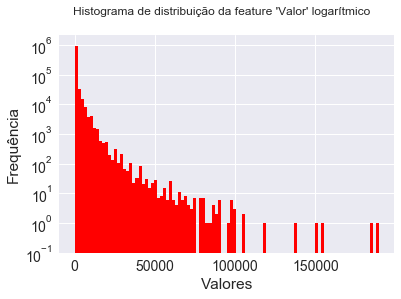

In [35]:
# Histograma com log
plt.hist(dft['Valor'], bins = 100, histtype = 'stepfilled', align = 'mid', rwidth = 10, log = True, color = 'red')
plt.suptitle("Histograma de distribuição da feature 'Valor' logarítmico", fontsize = fonte)
plt.xticks(rotation = 0)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

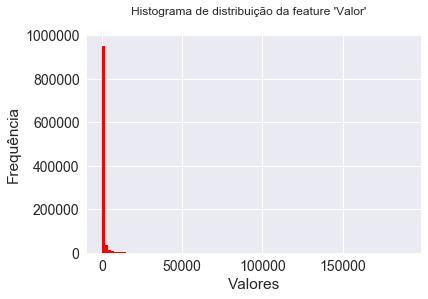

In [36]:
# Histograma com log
plt.hist(dft['Valor'], bins = 100, histtype = 'stepfilled', align = 'mid', rwidth = 10, log = False, color = 'red')
plt.suptitle("Histograma de distribuição da feature 'Valor'", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.xticks(rotation = 0)
plt.show()

/Users/tec/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


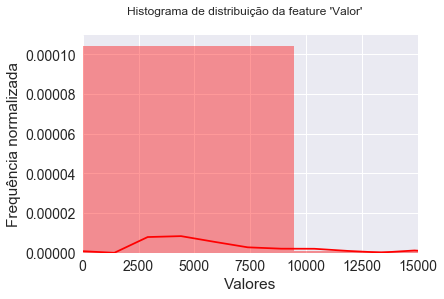

In [37]:
sns.distplot( dft["Valor"], bins=20 , hist = True,  kde = True, norm_hist=True, color = 'red')
plt.suptitle("Histograma de distribuição da feature 'Valor'", fontsize = fonte)
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
plt.xlim(0,15000)
plt.show()

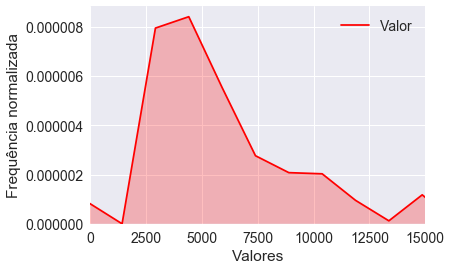

In [38]:
sns.kdeplot(dft['Valor'], color = 'red', shade = True);
plt.xlabel('Valores')
plt.ylabel('Frequência normalizada')
plt.xlim(0,15000)
plt.show()


### **C.2 Exportação do Data Frame com Dados Limpos para um arquivo CSV**

Para iniciar a análise exploratória propriamente dita é exportado o resultado da limpeza de dados para um novo arquivo CSV **df_trienio_limpo.csv**

In [39]:
dft.to_csv('./dataset/df_trienio_limpo.csv', index=False, sep=';', encoding = 'latin1')